# Question 4
## Download the data for the California Census and answer the following

a. What are the attributes for each district?
        
        It seems that most of the districts contain float64 data on logitude, latitude, median age, total rooms, total bedrooms, population, households, median income, ocean proximity, and median house value

b. What attributes are confusing to you?

        It seems that the names of some of the attributes may be confusing such as the median age. Also, ocean proximity may be hard to interperate looking at <1H OCEAN and NEAR OCEAN. The two definitions seem difficult to differentiate.

c. Without graphing tools, what observations can you make about the data?

        - There are some missing values for total bedrooms
        - There are only 5 ISLAND homes and the largest count attribute is <1H OCEAN at 9,136 observations
        - ISLAND homes have the greatest median age with INLAND homes having the lowest median age
        - ISLAND homes have the lowest number of total rooms and total bedrooms compared to the other attributes
        - ISLAND has the lowest number of households (unsure what this feature means)
        - ISLAND has the lowest median income but also has the lowest std of median income compared to the other homes
        - INLAND has the lowest median house values

# Question 5

Suppose you have two datasets A and B, they have exactly the same structure that each row
contains a single feature x and its corresponding label y and you want to train a linear regression
model to fit two datasets. 

a. Draw the possible predicted regression line for dataset A. (You can draw by hand)

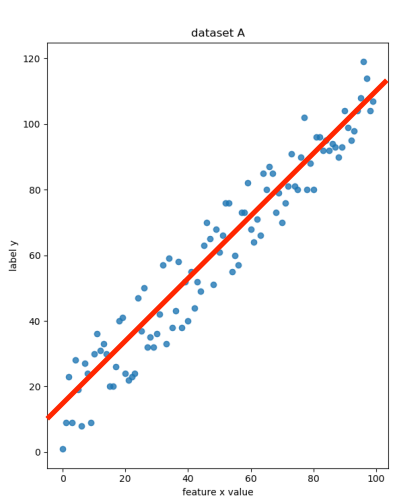

b. Draw the possible predicted regression line for dataset B. (You can draw by hand)

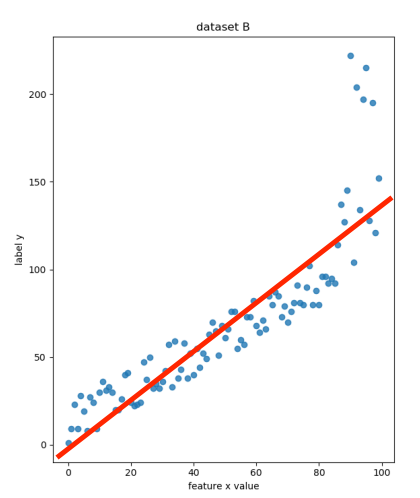

c. Which data points in dataset B are possible outliers, can you draw a circle around them?

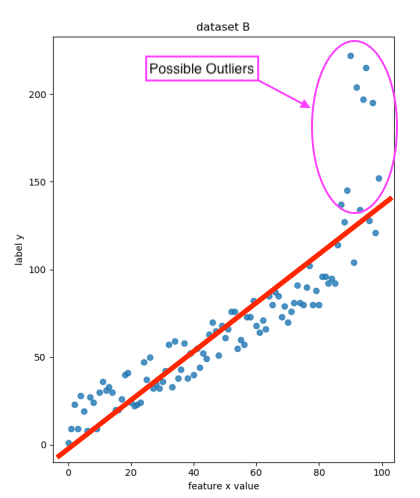

d. Draw the possible predicted regression line for dataset B after removing the outliers.
(You can draw by hand)

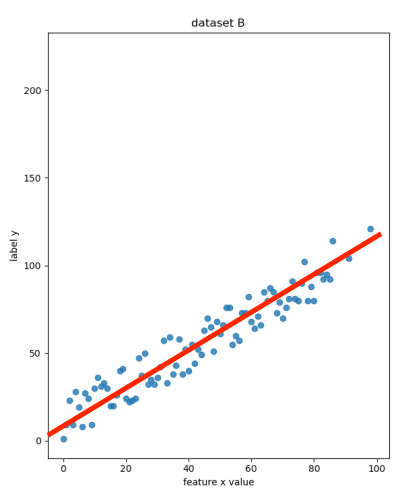

e. Suppose we use the mean square error to evaluate the model on dataset B, how does
removing possible outlier affect the mean square error?

The mean square error, compared to the root mean squared error, considers outliers more in it's evaluation by squaring simply the mean error calculation. Removing the outliers would essential lower the error value.
$\displaystyle\sum_{i=1}^{N}(predicated_i-actual_i)^2\frac{1}{N}$

# Assignment Module 2, Question 6 a-g:

# Fetching & Loading Data

In [143]:
import pandas as pd

In [144]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml/tree/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# NOT WORKING

In [145]:
# NOT WORKING
# fetch_housing_data()

In [146]:
# NOT WORKING
# import pandas as pd

# def load_housing_data(housing_path=HOUSING_PATH):
#     csv_path = os.path.join(housing_path, "housing.csv")
#     return pd.read_csv(csv_path)

# Data Exploration

In [147]:
# housing = load_housing_data()
# housing.head()

# upload the data
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [148]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [149]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [150]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [151]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

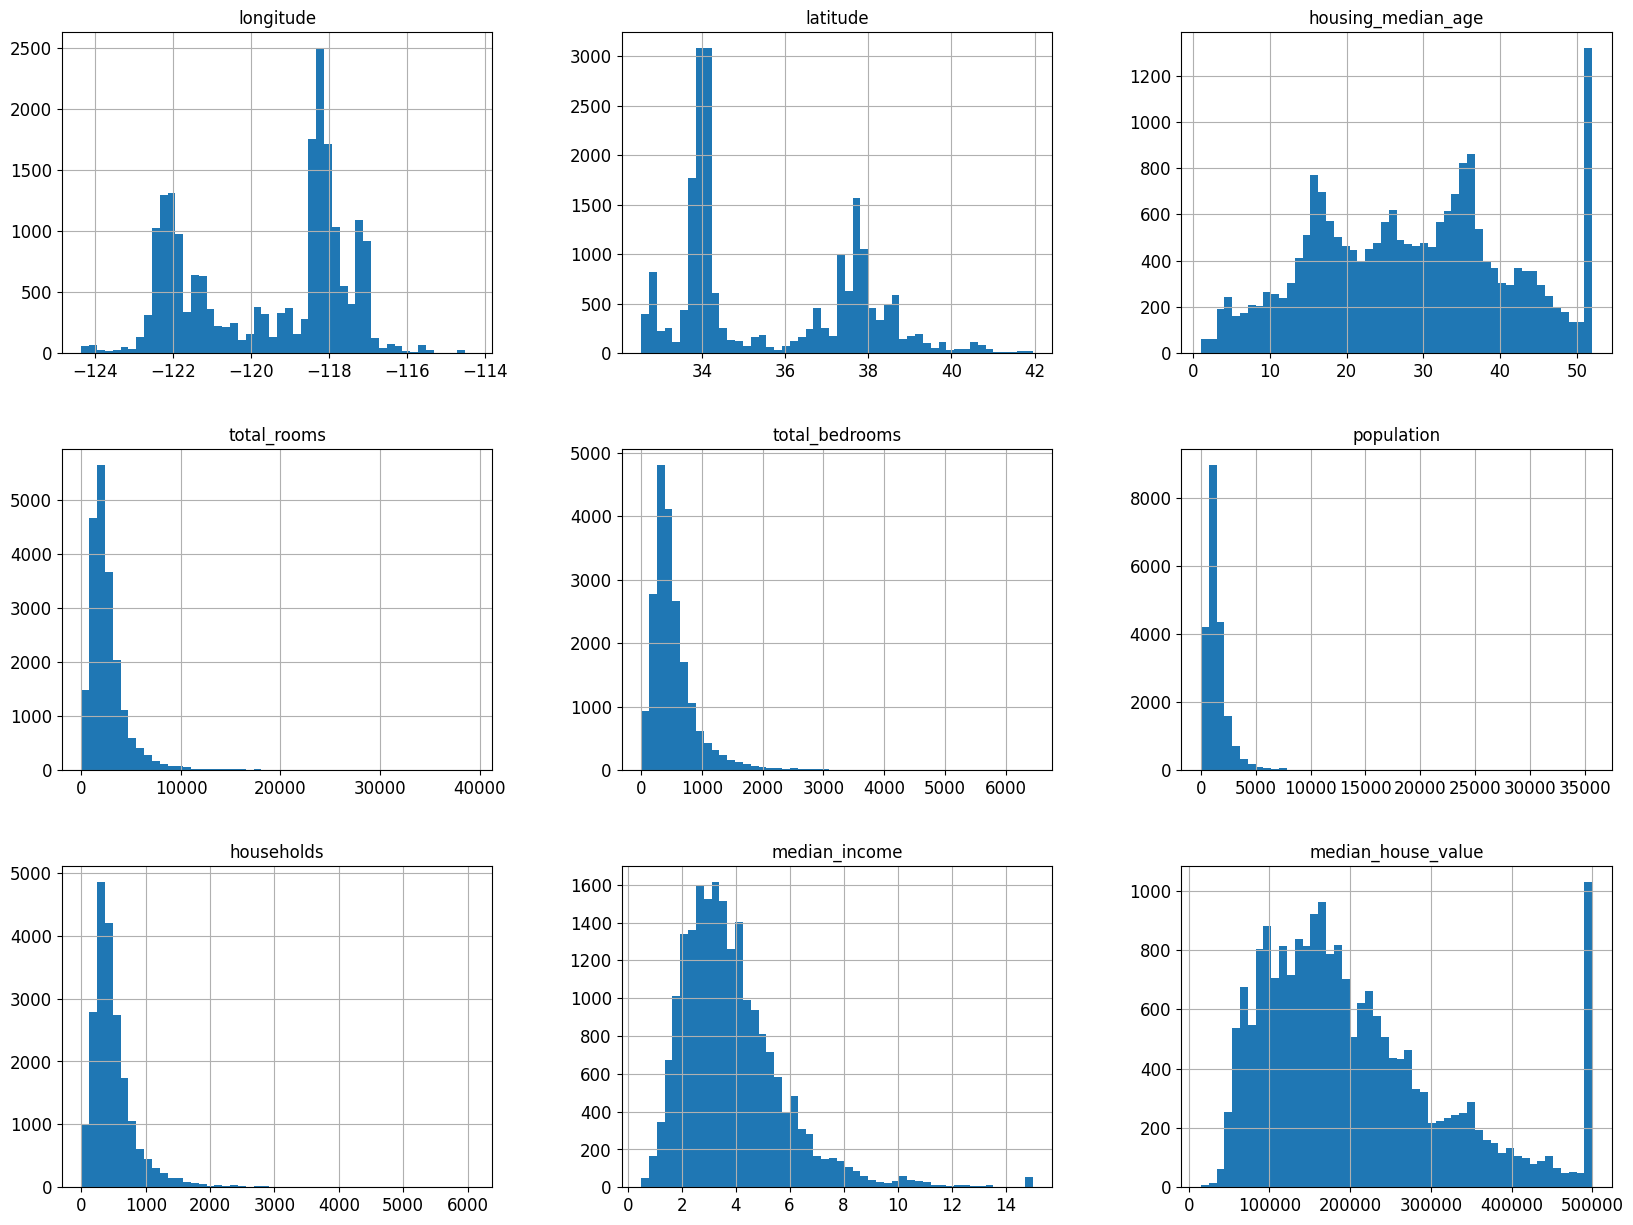

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Question 1 : Frame the Problem

Given a dataset like this, how can it be framed as a machine learning problem (try to frame it in different ways other than predicting housing price)? Is the problem you want to solve supervised learning or unsupervised learning ? Classification problem or regression problem ?

<i><b>
ANSWER:

There are a few predictions and/or approaches that we could make on this dataset.

1. We can try to use a supervised learning regression approach to predict the median income based on the other feautres of the data
2. We can also create unsurpervised classification mini models of each ocean proximity to determine if there are underlying segments of data present within this categorical data.</b></i>

<AxesSubplot:>

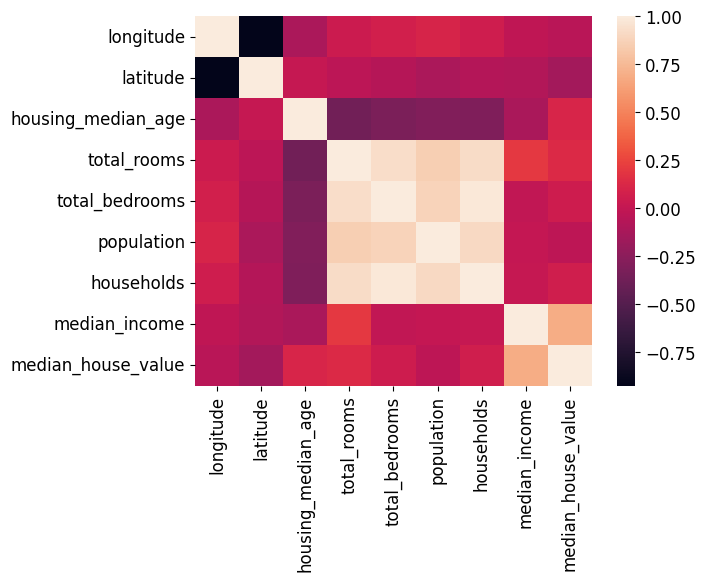

In [153]:
import seaborn as sns
# represent feature correlation matrix using a heatmap
corr = housing.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [154]:
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### Question 2 : Sign of Coefficients for Linear Regression

Given the equation of linear regression measure, the predicted dependent variable / target equals to the weighted sum of each independent variables / feature plus a bias / noise term, and the equation to predict the house price with all of the given features is shown below:

\begin{equation*}
median\_house\_value = \beta_0 * longitude + \beta_1 * latitude + \beta_2 * housing\_median\_age + \beta_3 * total\_rooms + \beta_4 * total\_bedrooms + \beta_5 * population + \beta_6 * households + \beta_7 * median\_income + \epsilon
\end{equation*}

Each feature weight is known as coefficient. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. And the machine learning is all about building algorithm to learn these coefficients and use the learned coefficients to predict future unseen data. Given the correlation matrix above. What can you concluded about the sign of each coefficient in this linear regression model?

<i><b>
ANSWER:

The sign of each coefficient is directly related to the positive or negative correlation of that value (median_house_value) to the other features in the data. If there is positive correlation then we can assume that an increase of one unit in the independent variables will cause an increase change in the dependent variable. For negatively correlated features, an increase of one unit in the independent variable would cause a decrease change in the dependent variable.
</b></i>

In [155]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [156]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [157]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [158]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [159]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")


In [160]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [161]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [162]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

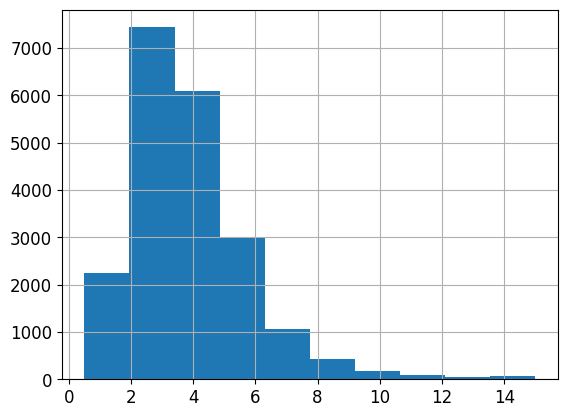

In [163]:
housing["median_income"].hist()

In [164]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [165]:
housing["income_cat"].value_counts()


3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

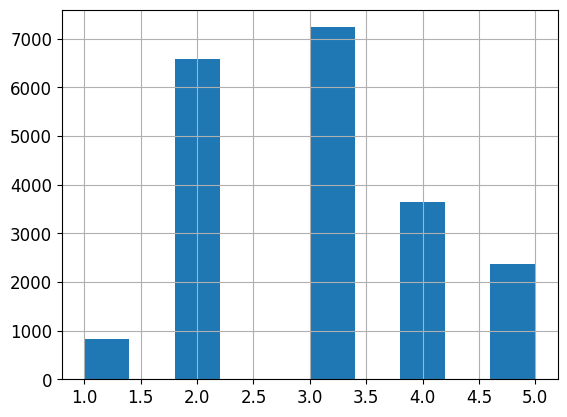

In [166]:
housing["income_cat"].hist()

In [167]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [168]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [169]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [170]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [171]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [172]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Question 3 : Try StratifiedShuffleSplit by Yourself

"median_income" was categorized into 5 groups and we use StratifiedShuffleSplit to make sure that the ratio of each group is exactly the same for training and test set.  Apply the same method on feature "housing_median_age" to preserve the percentage of samples for training and test set. (Hint: You have to choose the number of categories and the split thresholds carefully to avoid generating skewed data, you can make the decision based on the output of describe() method, this method can show some important statistics for each feature)

In [173]:
housing['housing_median_age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [174]:
housing["age_cat"] = pd.cut(housing["housing_median_age"],
                               bins=[0., 17, 28, 37, 45, np.inf], # TODO :: split the feature into different categories, expect 1 line of code
                               labels=[1, 2, 3, 4, 5]) # TODO :: label for each category, expect 1 line of code)

# TODO :: use StratifiedShuffleSplit to split the dataset into training set and test set while preserving 
# the percentage of samples for each category.
# expect 4 lines of code
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["age_cat"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]


In [175]:
strat_test_set['age_cat'].value_counts() / len(strat_test_set)

3    0.265746
2    0.264293
1    0.230378
4    0.132510
5    0.107074
Name: age_cat, dtype: float64

In [176]:
housing['age_cat'].value_counts() / len(housing)

3    0.265843
2    0.264147
1    0.230426
4    0.132461
5    0.107122
Name: age_cat, dtype: float64

In [177]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

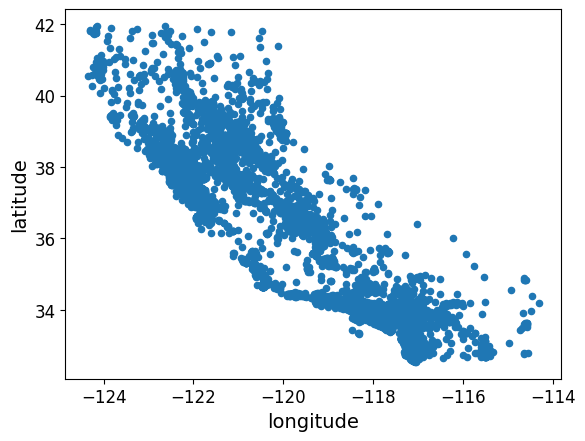

In [178]:
housing.plot(kind="scatter", x="longitude", y="latitude")

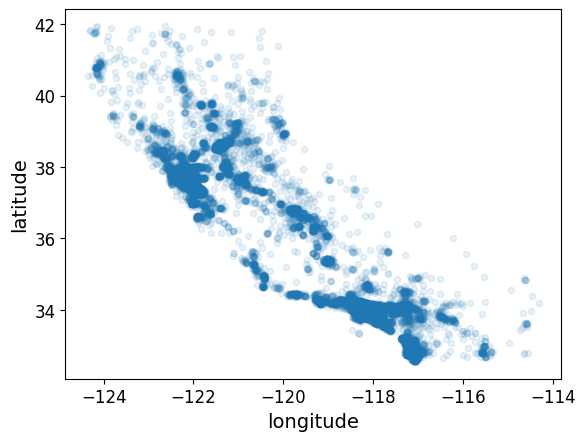

In [179]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

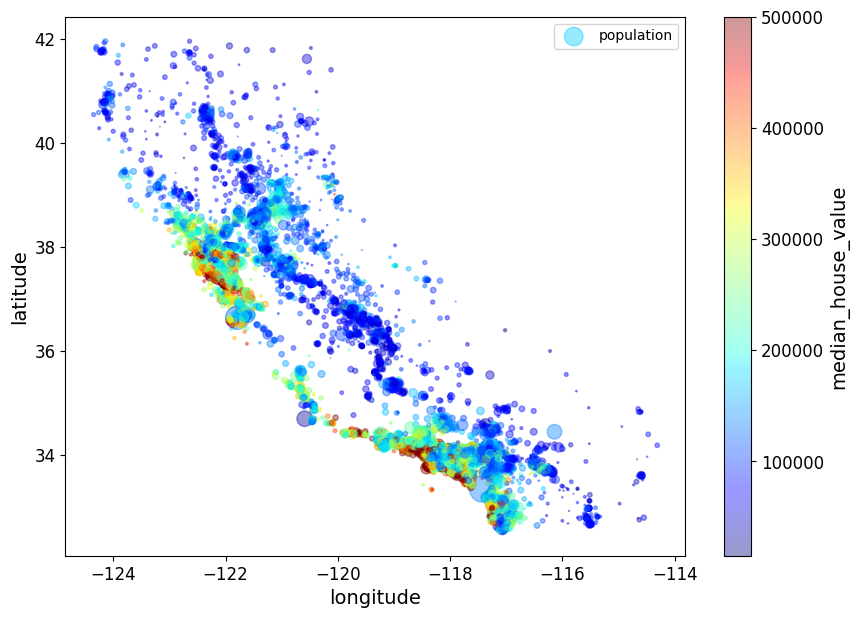

In [180]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [181]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()


In [182]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,age_cat
9877,-121.85,36.61,38.0,238.0,NaN,191.0,67.0,1.3897,<1H OCEAN,1,4
4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,<1H OCEAN,1,4
14015,-117.17,32.75,52.0,1052.0,NaN,381.0,201.0,3.0726,NEAR OCEAN,3,5
17825,-121.88,37.40,9.0,6751.0,NaN,4240.0,1438.0,5.3400,<1H OCEAN,4,1
19607,-121.02,37.48,26.0,467.0,NaN,244.0,83.0,4.1346,INLAND,3,2


In [183]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,age_cat
9877,-121.85,36.61,38.0,238.0,433.0,191.0,67.0,1.3897,<1H OCEAN,1,4
4591,-118.28,34.06,42.0,2472.0,433.0,3795.0,1179.0,1.2254,<1H OCEAN,1,4
14015,-117.17,32.75,52.0,1052.0,433.0,381.0,201.0,3.0726,NEAR OCEAN,3,5
17825,-121.88,37.40,9.0,6751.0,433.0,4240.0,1438.0,5.3400,<1H OCEAN,4,1
19607,-121.02,37.48,26.0,467.0,433.0,244.0,83.0,4.1346,INLAND,3,2


In [184]:
from sklearn.impute import SimpleImputer

In [185]:
imputer = SimpleImputer(strategy="median")

In [186]:
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [187]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2126.    ,  433.    , 1165.    ,
        408.    ,    3.5385,    3.    ,    3.    ])

In [188]:
housing_num.median().values

/var/folders/hw/f8pnpzm163q0j3yww182vmgm0000gn/T/ipykernel_58587/3605723347.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median().values


array([-118.49  ,   34.25  ,   29.    , 2126.    ,  433.    , 1165.    ,
        408.    ,    3.5385])

In [189]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,age_cat
9877,-121.85,36.61,38.0,238.0,433.0,191.0,67.0,1.3897,1.0,4.0
4591,-118.28,34.06,42.0,2472.0,433.0,3795.0,1179.0,1.2254,1.0,4.0
14015,-117.17,32.75,52.0,1052.0,433.0,381.0,201.0,3.0726,3.0,5.0
17825,-121.88,37.40,9.0,6751.0,433.0,4240.0,1438.0,5.3400,4.0,1.0
19607,-121.02,37.48,26.0,467.0,433.0,244.0,83.0,4.1346,3.0,2.0


In [190]:
imputer.strategy

'median'

In [191]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,age_cat
10136,-117.89,33.92,34.0,1473.0,312.0,1025.0,315.0,3.8333,3.0,3.0
19878,-119.27,36.34,7.0,3433.0,626.0,1793.0,626.0,3.5296,3.0,1.0
16823,-122.48,37.65,39.0,3348.0,666.0,1817.0,668.0,4.2593,3.0,4.0
13526,-117.30,34.18,28.0,2685.0,425.0,1304.0,420.0,4.3676,3.0,2.0
9166,-118.43,34.43,5.0,21113.0,4386.0,9842.0,3886.0,4.2037,3.0,1.0


In [192]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
10136,<1H OCEAN
19878,INLAND
16823,NEAR OCEAN
13526,INLAND
9166,<1H OCEAN
16443,INLAND
14729,<1H OCEAN
5345,<1H OCEAN
10827,<1H OCEAN
18400,<1H OCEAN


In [193]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [1.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [194]:
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [195]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [196]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [197]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'income_cat', 'age_cat'],
      dtype='object')

### Question 4 : Pros and Cons of One-Hot-Encoding

One hot encoding is a way to transform categorical feature into the format that the model can take as input. One hot encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. Can it be used for 'closest_city' feature? Why or why not? 

<b>ANSWER:

If there was a new feature called "closest_city", it would depend on how the data for that feature is represented. For example, if the data is city names then there may be too many city names represented and would cause too many columns. However, if closest_city was measured as a range distance categorical variable (i.e. 250 - 500)which is representative of a set of radial range distances from a central distance point, then it may be something we can measure.
</b>


In [61]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [62]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,age_cat,rooms_per_household,population_per_household
10136,-117.89,33.92,34.0,1473.0,312.0,1025.0,315.0,3.8333,<1H OCEAN,3,3,4.67619,3.253968
19878,-119.27,36.34,7.0,3433.0,626.0,1793.0,626.0,3.5296,INLAND,3,1,5.484026,2.864217
16823,-122.48,37.65,39.0,3348.0,666.0,1817.0,668.0,4.2593,NEAR OCEAN,3,4,5.011976,2.72006
13526,-117.3,34.18,28.0,2685.0,425.0,1304.0,420.0,4.3676,INLAND,3,2,6.392857,3.104762
9166,-118.43,34.43,5.0,21113.0,4386.0,9842.0,3886.0,4.2037,<1H OCEAN,3,1,5.433093,2.532681


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.83687762, -0.79969705,  0.42631831, ..., -0.29340717,
         0.01393503, -0.02822499],
       [ 0.14796876,  0.33229253, -1.71876468, ...,  0.01546849,
        -0.01972592, -0.47559128],
       [-1.45449315,  0.94506375,  0.8235559 , ..., -0.16501959,
        -0.03217611, -0.22390271],
       ...,
       [ 0.59725715, -0.65936776, -1.4009746 , ..., -0.54689863,
         0.05701937,  0.90313518],
       [ 1.13640321, -0.74824297, -1.55986964, ...,  0.05339534,
        -0.05324357, -0.41533529],
       [-0.99522058,  0.67843811, -0.9242895 , ...,  0.42235496,
         0.0221069 , -0.87134193]])

In [64]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.83687762, -0.79969705,  0.42631831, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14796876,  0.33229253, -1.71876468, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45449315,  0.94506375,  0.8235559 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59725715, -0.65936776, -1.4009746 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.13640321, -0.74824297, -1.55986964, ...,  0.        ,
         0.        ,  0.        ],
       [-0.99522058,  0.67843811, -0.9242895 , ...,  0.        ,
         0.        ,  0.        ]])

In [65]:
housing_prepared.shape

(16512, 18)

In [66]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [67]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [209372.566514   117382.1515693  279462.65406157 156884.66016665
 314327.68244352]


In [68]:
print("Labels:", list(some_labels))

Labels: [170400.0, 83700.0, 227400.0, 111100.0, 194600.0]


In [69]:
some_data_prepared

array([[ 8.36877621e-01, -7.99697046e-01,  4.26318306e-01,
        -5.29240767e-01, -5.29734487e-01, -3.49447585e-01,
        -4.78070171e-01, -2.46199055e-02, -1.06405520e-02,
         2.98697988e-01, -2.93407173e-01,  1.39350277e-02,
        -2.82249851e-02,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.47968762e-01,  3.32292532e-01, -1.71876468e+00,
         3.58337831e-01,  2.06190201e-01,  3.19533292e-01,
         3.24324277e-01, -1.83010560e-01, -1.06405520e-02,
        -1.28058513e+00,  1.54684900e-02, -1.97259231e-02,
        -4.75591275e-01,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.45449315e+00,  9.45063750e-01,  8.23555895e-01,
         3.19845902e-01,  2.99938569e-01,  3.40438944e-01,
         4.32686229e-01,  1.97554671e-01, -1.06405520e-02,
         1.08833955e+00, -1.65019593e-01, -3.21761137e-02,
        -2.23902712e-01,  0.00000000e+00,  0.00000000e

In [70]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67540.7281550579

In [71]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49258.94804580592

In [93]:
housing_labels

10136    170400.0
19878     83700.0
16823    227400.0
13526    111100.0
9166     194600.0
           ...   
15430    147500.0
17038    395500.0
3687     174100.0
13666    197700.0
18480    393100.0
Name: median_house_value, Length: 16512, dtype: float64

In [88]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("predictor", lin_reg)# TODO :: expect 1 line of code
    ])


# fit on the data 
full_pipeline_with_predictor.fit(pd.DataFrame(housing_prepared), housing_labels) # TODO :: expect 1 line of code
full_pipeline_with_predictor.predict(some_data)

ValueError: A given column is not a column of the dataframe

In [94]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [95]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [96]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [68090.81511436 65555.67564105 70608.24845427 71192.38527448
 69944.97761238 70524.25886591 70320.07486182 71414.10109051
 65648.8649296  71551.51641513]
Mean: 69485.09182595088
Standard deviation: 2150.744864070651


##### Question 5 : Is Decision Tree Regressor a Great Model ? 
The decision tree regressor has 0 error on the training set, is that a good model? why or why not ?

<b>
ANSWER:

The decision tree containing an error of 0 means that the data is overfit to the training data and will not predict the testing data appropriately.
</b>

In [97]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67864.17629349 66906.38736285 67338.75620094 69785.0118753
 69213.1078803  64015.41097898 67705.83839762 67282.14231407
 69110.75459162 69718.59448549]
Mean: 67894.01803806647
Standard deviation: 1639.0057822711708


In [98]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [99]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21907.189013928648

In [100]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [50435.72742119 50450.15069523 53867.62835892 53696.28952219
 53464.18153014 52501.26601765 52310.98995393 51879.0847344
 49474.96191956 52410.86678604]
Mean: 52049.11469392323
Standard deviation: 1422.7210589893061


In [101]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     67894.018038
std       1727.663790
min      64015.410979
25%      67296.295786
50%      67785.007346
75%      69187.519558
max      69785.011875
dtype: float64

##### Question 6 : Try Out SVR Model

Try a support vector machine regressor with various hyperparameters such as kernel = "linear" (with various values for the C hyperparameter) or kernel = "rbf" (with various values for the C and gamma hyperparameter). Don't worry about what these parameters mean for now. How does the best SVR predictor perform? You can refer to https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html for more description.


In [127]:
from sklearn.svm import SVR
# attempt using linear

c_gamma_parameter_random_list = [(3, 5), (2, 2), (5, 3), (6, 4), (1.0, 1.0), (6, 1)]

for c, gamma in c_gamma_parameter_random_list:
    svm_reg = SVR(kernel="linear", C=c, gamma=gamma)
    svm_reg.fit(housing_prepared, housing_labels)
    housing_predictions = svm_reg.predict(housing_prepared)
    svm_mse = mean_squared_error(housing_labels, housing_predictions)
    svm_rmse = np.sqrt(svm_mse)
    print(f'c={c}\ngamma={gamma}\nrmse={svm_rmse}\n')

c=3
gamma=5
rmse=91903.71907928665

c=2
gamma=2
rmse=97510.23236584605

c=5
gamma=3
rmse=85364.97053253266

c=6
gamma=4
rmse=83280.80237421073

c=1.0
gamma=1.0
rmse=106016.94936243235

c=6
gamma=1
rmse=83280.80237421073



In [126]:
from sklearn.svm import SVR

# attempt using rbf

c_gamma_parameter_random_list = [(3, 5), (2, 2), (5, 3), (6, 4), (1.0, 1.0)]

for c, gamma in c_gamma_parameter_random_list:
    svm_reg = SVR(kernel="rbf", C=c, gamma=gamma)
    svm_reg.fit(housing_prepared, housing_labels)
    housing_predictions = svm_reg.predict(housing_prepared)
    svm_mse = mean_squared_error(housing_labels, housing_predictions)
    svm_rmse = np.sqrt(svm_mse)
    print(f'c={c}\ngamma={gamma}\nrmse={svm_rmse}\n')

c=3
gamma=5
rmse=118294.20739891082

c=2
gamma=2
rmse=118286.61155901091

c=5
gamma=3
rmse=118279.6432111982

c=6
gamma=4
rmse=118287.55143394705

c=1.0
gamma=1.0
rmse=118270.06577781877



When our kernal is set to linear and C is set to larger values, we seem to get a better rmse at 83280 while changing gamma does not yield very significant changes. Although results are still better than the default settings, they are still not the best. When we set kernal to rbf our rmse results, essentially, do not change. 

### Question 7 : Try Out Different Hyperparameter Tuning Strategies? 

Try to replace GridSearchCV in the following code with RandomizedSearchCV.

In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [129]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [130]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [131]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63721.58164901315 {'max_features': 2, 'n_estimators': 3}
54941.94943737582 {'max_features': 2, 'n_estimators': 10}
52593.02847347378 {'max_features': 2, 'n_estimators': 30}
59160.918055561786 {'max_features': 4, 'n_estimators': 3}
52096.64454998849 {'max_features': 4, 'n_estimators': 10}
50418.89464887303 {'max_features': 4, 'n_estimators': 30}
58983.9677544712 {'max_features': 6, 'n_estimators': 3}
52096.8543537403 {'max_features': 6, 'n_estimators': 10}
50043.85502273994 {'max_features': 6, 'n_estimators': 30}
59183.54641685389 {'max_features': 8, 'n_estimators': 3}
51976.41266032444 {'max_features': 8, 'n_estimators': 10}
49983.426194521664 {'max_features': 8, 'n_estimators': 30}
62112.25344012405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53298.014351153724 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60077.57580965311 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52837.97597046513 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [132]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047957,0.012397,0.002205,0.000359,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.044657e+09,-4.313385e+09,...,-4.060440e+09,1.404074e+08,18,-1.057791e+09,-1.011504e+09,-1.077740e+09,-1.064412e+09,-1.109552e+09,-1.064200e+09,3.180600e+07
1,0.132013,0.000711,0.006165,0.000143,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.043291e+09,-3.073022e+09,...,-3.018618e+09,6.259599e+07,11,-5.790632e+08,-5.302288e+08,-5.578093e+08,-5.322910e+08,-5.629919e+08,-5.524768e+08,1.869910e+07
2,0.401106,0.002947,0.017467,0.000238,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.780128e+09,-2.848860e+09,...,-2.766027e+09,7.716819e+07,8,-4.316371e+08,-4.075235e+08,-4.238566e+08,-4.215150e+08,-4.272934e+08,-4.223651e+08,8.166726e+06
3,0.069109,0.001036,0.001989,0.000046,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.293821e+09,-3.732031e+09,...,-3.500014e+09,2.268509e+08,14,-9.250285e+08,-9.153111e+08,-9.335107e+08,-9.306419e+08,-9.456486e+08,-9.300282e+08,9.980896e+06
4,0.229539,0.001555,0.005961,0.000135,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.662994e+09,-2.883486e+09,...,-2.714060e+09,1.329472e+08,6,-5.273016e+08,-4.977747e+08,-5.117343e+08,-4.996806e+08,-5.033599e+08,-5.079702e+08,1.078696e+07
5,0.694673,0.007679,0.017224,0.000196,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.533149e+09,-2.680352e+09,...,-2.542065e+09,1.079271e+08,3,-3.956097e+08,-3.813004e+08,-3.905993e+08,-3.899062e+08,-3.907453e+08,-3.896322e+08,4.634631e+06
6,0.097629,0.001411,0.002093,0.000099,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.503715e+09,-3.598084e+09,...,-3.479108e+09,1.042696e+08,13,-8.914913e+08,-8.874019e+08,-9.331169e+08,-8.995775e+08,-8.800347e+08,-8.983245e+08,1.850727e+07
7,0.344146,0.012429,0.007044,0.001327,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.694400e+09,-2.911659e+09,...,-2.714082e+09,1.353581e+08,7,-5.048385e+08,-4.755066e+08,-4.955895e+08,-4.941688e+08,-4.811712e+08,-4.902549e+08,1.054971e+07
8,0.974227,0.014485,0.017511,0.000310,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.449816e+09,-2.674198e+09,...,-2.504387e+09,1.324308e+08,2,-3.871881e+08,-3.703967e+08,-3.834222e+08,-3.835319e+08,-3.813919e+08,-3.811862e+08,5.709302e+06
9,0.125504,0.001262,0.002094,0.000101,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.481263e+09,-3.656808e+09,...,-3.502692e+09,1.625754e+08,15,-9.165008e+08,-8.730438e+08,-9.082491e+08,-9.035502e+08,-9.174188e+08,-9.037526e+08,1.620230e+07


In [133]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x17cf07f40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x17cf07040>},
                   random_state=42, scoring='neg_mean_squared_error')

In [134]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49381.72478301226 {'max_features': 7, 'n_estimators': 180}
51312.86854233667 {'max_features': 5, 'n_estimators': 15}
50559.01737713237 {'max_features': 3, 'n_estimators': 72}
50792.077355572954 {'max_features': 5, 'n_estimators': 21}
49416.48383558673 {'max_features': 7, 'n_estimators': 122}
50573.91976323653 {'max_features': 3, 'n_estimators': 75}
50499.970595963896 {'max_features': 3, 'n_estimators': 88}
49605.347440712205 {'max_features': 5, 'n_estimators': 100}
50288.14446001331 {'max_features': 3, 'n_estimators': 150}
63338.69502053128 {'max_features': 5, 'n_estimators': 2}


In [135]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.13592431e-02, 5.54339098e-02, 3.44272286e-02, 1.60519084e-02,
       1.68987678e-02, 1.50439158e-02, 1.44204601e-02, 3.14488897e-01,
       1.15275383e-01, 1.63262512e-02, 3.15615544e-02, 1.09915525e-01,
       4.64301993e-02, 1.01347418e-02, 1.34452147e-01, 2.18856784e-04,
       3.20490978e-03, 4.35610097e-03])

In [140]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3144888970633231, 'median_income'),
 (0.1344521465251694, 'INLAND'),
 (0.11527538346656484, 'income_cat'),
 (0.10991552522480864, 'pop_per_hhold'),
 (0.061359243104737185, 'longitude'),
 (0.05543390981283001, 'latitude'),
 (0.04643019934456452, 'bedrooms_per_room'),
 (0.034427228558141294, 'housing_median_age'),
 (0.03156155435538178, 'rooms_per_hhold'),
 (0.016898767754755944, 'total_bedrooms'),
 (0.016326251182272548, 'age_cat'),
 (0.016051908407748724, 'total_rooms'),
 (0.01504391578581118, 'population'),
 (0.014420460092294434, 'households'),
 (0.01013474179209512, '<1H OCEAN'),
 (0.004356100968601251, 'NEAR OCEAN'),
 (0.003204909776991906, 'NEAR BAY'),
 (0.0002188567839079605, 'ISLAND')]

In [137]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

ValueError: X has 11 features, but ColumnTransformer is expecting 18 features as input.

In [139]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,age_cat
6656,-118.13,34.15,18.0,1665.0,477.0,1095.0,390.0,2.6038,155600.0,<1H OCEAN,2,2
13023,-121.23,38.67,27.0,5266.0,971.0,2432.0,948.0,3.8954,133000.0,INLAND,3,2
18023,-121.95,37.25,34.0,2906.0,544.0,1282.0,522.0,5.5127,268200.0,<1H OCEAN,4,3
7156,-118.15,34.04,44.0,647.0,142.0,457.0,143.0,3.6875,162500.0,<1H OCEAN,3,4
14327,-117.16,32.71,5.0,2508.0,827.0,2066.0,761.0,1.3092,325000.0,NEAR OCEAN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4156,-118.20,34.12,44.0,1565.0,398.0,1500.0,407.0,2.8125,155600.0,<1H OCEAN,2,4
476,-122.28,37.85,52.0,2246.0,472.0,1005.0,449.0,2.4167,152700.0,NEAR BAY,2,5
8185,-118.10,33.79,35.0,2370.0,379.0,996.0,380.0,5.7368,287200.0,<1H OCEAN,4,3
5888,-118.33,34.15,44.0,1321.0,303.0,471.0,301.0,4.2679,331800.0,<1H OCEAN,3,4


In [202]:
final_rmse

NameError: name 'final_rmse' is not defined

In [ ]:
from scipy import stats

In [ ]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))